<a href="https://colab.research.google.com/github/SergeyS1954/LW_TR/blob/main/LW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа № 3
## Резервирование как метод повышения надежности

## Основные определения

*Резервирование* - метод обеспечения надежности системы за счет использования дополнительных элементов, избыточных по отношению к минимально необходимому множеству для выполнения требуемых функций с целью сохранения работоспособного состояния объекта при отказе одного или нескольких элементов.

*Основной элемент* --- элемент, необходимый для выполнения требуемых функций без использования резерва.

*Резервный элемент* --- элемент, предназначенный для выполнения функций основного элемента в случае его отказа.

*Структурное резервирование* обеспечивается за счет введения в структуру системы (объекта) дополнительных элементов, которые выполняют функции основных элементов в случае их отказа.




## Классификация методов структурного резервирования

**Классификационные признаки** структурного резервирования:

1. Организация восстановления отказавших элементов;
2. Организация нагрузки на резервные элементы.

По *организации восстановления* отказавших элементов выделяют:

--- *резервирование с восстановлением* ---  работоспособность отказавших элементов восстанавливается без прекращения функционирования включающей элемент системы;

--- *резервирование без восстановления* ---  работоспособность отказавших элементов не восстанавливается.

По *организации нагрузки на резервные элементы* выделяют:

--- *горячее резервирование* --- основной и резервный элементы работают в одинаковом режиме;
--- *холодное резервирование* --- резервные элементы не несут нагрузки до момента подключения их вместо отказавшего.


## Кратность резервирования

*Кратность резервирования* --- это отношение числа резервирующих элементов к числу резервируемых элементов (основных), выраженное несокращаемой дробью.

Кратность резервирования $m$ определяется соотношением:

$$
	m = \frac{r}{bas},
$$
где $r$ --- число резервных элементов; $bas$ --- число основных элементов.

Например, если кратность резервирования обозначена $m = 3/2$, то это означает наличие резервирования с дробной кратностью, при котором число резервных элементов равно $r = 3$, число основных элементов равно $bas = 2$, а общее число элементов равно $5$.

Резервирование элементов системы с кратностью $m = 1$ обычно называют  *дублированием*.



## Горячее резервирование с целой кратностью

Горячее резервирование с целой кратностью предполагает, что  основной и каждый резервирующий объект имеют одинаковое количество элементов, соединенных параллельно в структурной схеме надежности. Резервирующие объекты включены параллельно основному объекту и самим себе.

Обозначим через $\lambda_0 $ --- интенсивность отказов основного  или любого из резервных объектов.

Тогда  вероятность безотказной работы системы $P_s(t)$ определяется соотношением:

$$
	P_s(t) = 1 - (1 - e^{-\lambda_0 t})^{m+1}.
$$

Средняя наработка до отказа объекта с горячим резервированием с целой кратностью определяется по формуле:

$$
	\bar T = \frac{1}{\lambda_0}\sum_{i = 1}^{m}\frac{1}{i + 1}.
$$


Рассмотрим задачу определения кратности резервирования $m$, необходимой для достижения заданной надежности системы, для которой используется схема горячего резервирования с целой кратностью.

решение может быть получено по формуле:
$$
m = \frac {\log (1 - P_{з})}{\log (1 - P_0)} - 1,   
$$
где $ P_{z}$ --- заданная надежность резервированной системы, а $P_0$ --- надежность элемента без резервирования.

Ниже приведена зависимость $m$ от значения  $P_0$ --- надежности элемента без резервирования при заданных значениях  $ P_{z}$.


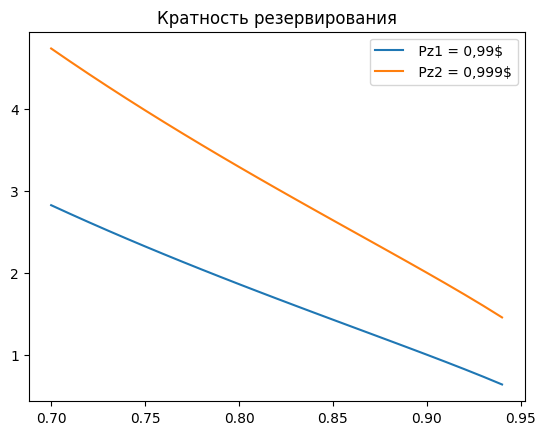

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
Pz1 = 0.99
Pz2 = 0.999
p0 = np.arange (0.7, 0.95, 0.01)
y1 = (np.log(1-Pz1))/(np.log(1-p0)) -1
y2 = (np.log(1-Pz2))/(np.log(1-p0)) -1
plt.plot(p0,y1, label = " Pz1 = 0,99$")
plt.plot(p0,y2, label = " Pz2 = 0,999$")
plt.legend()
plt.title('Кратность резервирования')
plt.show()

На графике значение $m$ действительное, а не целое. Какие практические рекомендации о выборе $m$ можно дать, исходя из приведенных данных?

## Холодное резервирование с целой кратностью

Для метода холодного резервирования предполагается, что при отказе основного объекта он отключается, а вместо него подключается один из резервных объектов. Таким образом, резервированная система откажет в случае отказа основного и всех резервных объектов.

В рамках данной модели предполагается, что переключающие элементы системы устройства безотказны, т.е. абсолютно надежны. Это допущение модели, возможность использования которого должна быть обоснована при анализе реальной системы.

Обозначим, как и ранее,  через $\lambda_0 $ --- интенсивность отказов основного  или любого из резервных элементов.

Средняя наработка до отказа системы с холодным резервированием объекта определеяетя по формуле:

$$
\bar T_m = \frac{m + 1}{\lambda_0} = (m + 1) T_0,  
$$
где через $ T_0$ обозначено время наработки на отказ для системы без резерва.



## Модели дублирования элемента с восстановлением

Рассмотрим модель резервирования системы с восстанавливаемыми элементами. В отличие от ранее рассмотренной модели вышедший из строя (отказавший) элемент переходит в работоспособное состояние в течение некоторого времени. Процесс перехода (перевода) отказавшего элемента в работоспособное состояние называется *восстановлением*.

Дублирование элемента является простейшим и широко распространенным случаем резервирования восстанавливаемого элемента.

Рассмотрим простейшую модель системы, состоящей из двух элементов: основного и дублирующего (резервного). Будем считать, что время безотказной работы обоих элементов имеет экспоненциальное распределение с параметром $\lambda$, а время восстановления --- экспоненциальное распределение с параметром $\mu$.


##Расчет параметров системы для различных вариантов подключения дублирующего элемента и вариантов восстановления элементов.

Введем состояния системы $S_0, S_1, S_2$, где индекс определяет число отказавших элементов (т.е. элементов, находящихся в  неработоспособном состоянии).

В случае нагруженного резервирования $\lambda_0 = 2 \lambda$ и $\lambda_1 = \lambda$.

Для ненагруженного резервирования: $\lambda_0 = \lambda_1 = \lambda$.

Симметрично, для неограниченного восстановления: $\mu_1 = 2 \mu$ и $\mu_0 = \mu$. Для ограниченного восстановления: $\mu_1 = \mu_0 = \mu$.

Расчет основной надежностной характеристики системы --- коэффициента готовности.

Для стационарного режима *уравнения баланса* выглядят следущим образом:
$$
-\lambda_0 \pi_0 + \mu_0 \pi_1 = 0, \nonumber \\
\lambda_0 \pi_0 - (\mu_0 + \lambda_1)\pi_1 + \mu_1 \pi_2 = 0,  \nonumber \\
-\lambda_1 \pi_1 + \mu_1 \pi_2 = 0.
$$

Обозначим $\rho_0 = \frac{\lambda_0}{\mu_0}$ и $\rho_1 = \frac{\lambda_1}{\mu_1}.$

Решая систему (уравнения баланса) с учетом условия нормировки ($\pi_0+\pi_1+\pi_2 =1$), получаем:  
$$
\pi_0 = \frac{1}{1+ \rho_0 + \rho_0\rho_1}; \nonumber \\
\pi_1 = \frac{\rho_0}{1+ \rho_0 + \rho_0\rho_1}; \nonumber \\
\pi_2 = \frac{\rho_0\rho_1}{1+ \rho_0 + \rho_0\rho_1}.
$$

Коэффициент готовности системы $K_{г}$ определяется как вероятность нахождения системы в состояниях $S_0$ или $S_1$. Подставляя полученные значения вероятностей состояния системы, получаем

$$  K_{r} = \frac{1 + \rho_0}{1+ \rho_0 + \rho_0\rho_1}.  
$$  


Для различных вариантов резервирования элемента можно получить более простые и наглядные формулы.

Нагруженное резервирование с неограниченным восстановлением ($\rho_0 = 2\rho,  \rho_1 = \frac{1}{2}\rho$):
$$  K_{1} = \frac{1 + 2\rho}{1 + 2\rho + \rho^2}.  
$$  

Нагруженное резервирование с ограниченным восстановлением ($\rho_0 = 2\rho,  \rho_1 = \rho$):
$$  K_{2} = \frac{1 + 2\rho}{1 + 2\rho + 2\rho^2}.  
$$

Ненагруженное резервирование с неограниченным восстановлением ($\rho_0 = \rho,  \rho_1 = \frac{1}{2}\rho$):
$$  K_{3} = \frac{1 + \rho}{1 + \rho + \frac{1}{2}\rho^2}.  
$$  

Ненагруженное резервирование с ограниченным восстановлением ($\rho_0 = \rho,  \rho_1 = \rho$):
$$  K_{4} = \frac{1 + \rho}{1 + \rho + \rho^2}.  
$$     

Рсчет коэффициентов готовности для различных вариантов.

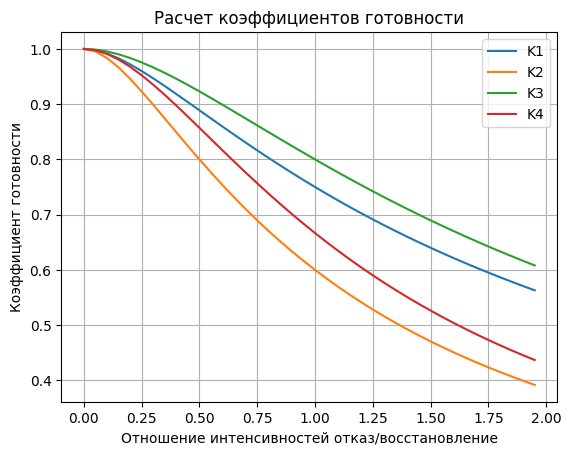

In [6]:
import numpy as np
import matplotlib.pyplot as plt
#import math
t0  = 1.0
k = 0
ro = np.arange (0, 2.0, 0.05)
K1  = (1 + 2*ro)/(1 + 2*ro + ro**2)
K2 = (1 + 2*ro)/(1 + 2*ro + 2*ro**2)
K3  = (1 + ro)/(1 + ro + 0.5*ro**2)
K4 = (1 + ro)/(1 + ro + ro**2)
fig = plt.figure()
plt.plot (ro,K1, label = 'K1')
plt.plot (ro,K2, label = 'K2')
plt.plot (ro,K3, label = 'K3')
plt.plot (ro,K4, label = 'K4')
plt.title('Расчет коэффициентов готовности')
plt.xlabel('Отношение интенсивностей отказ/восстановление')
plt.ylabel('Коэффициент готовности')
plt.legend()
plt.grid(True)
plt.show()


# Модель с конечным источником нагрузки
Рассмотрим замкнутую систему,  которая состоит из $N$ элементов, каждый из которых может создать требование на обслуживание, связанное с его отказом.

Система $S_1$ формирует  "входящий поток",  который состоит из  случайного конечного число $N$ требований, а система $S_2$ осуществляет "обслуживание".
Пусть в системе $S_1$  "время жизни" каждого элемента распределено по экспоненциальному закону с параметром $\lambda$.

Система $S_2$ состоит из  $M$ однотипных "восстанавливающих" устройств. В случае выхода элемента из строя он начинает сразу восстанавливаться одним из свободных восстанавливающих устройств. Время восстановления является случайной величиной, распределенной по экспоненциальному закону с параметром $\mu$. Если все восстанавливающие устройства заняты, отказавший элемент встает в очередь и ждет до тех пор, пока  какое-либо восстанавливающее устройство освободится.

Обслуживание осуществляется в соответствии с естественной дисциплиной: "Первый пришел --- первый обслужен" $(FCFS)$.

Bсследуемый процес является процессом размножения-гибели, для которого известно решение в общем виде.

Уравнения баланса выглядят следующим образом:
$$
		\lambda_0 \pi_0  =  \mu_1 \pi_1, \\
	  (\lambda_{k} + \mu_{k}) \pi_k    
	=  \lambda_{k-1}\pi_{k-1} +  \mu_{k+1}\pi_{k+1},  \  1\leq k < N, \\
		\mu_{N}\pi_N   =  \lambda_{N-1}\pi_{N-1}.
$$

Обозначим $\rho_{i} = \frac {\lambda_{i-1}}{\mu_i}, \  i=1,2,\dots,N$.
Из первого равенства уравнения баланса  получаем
$$
\pi_1 =  \rho_1 \pi_0.
$$
Из второго равенства уравнения баланса  (\ref{g_fi_11})
$$
(\lambda_1 + \mu_1) \pi_1 = \lambda_0 \pi_0 + \mu_2\pi_2
$$
получаем
$$
\pi_2 = \frac{\lambda_0\lambda_1}{\mu_1\mu_2} \pi_0 = \rho_1\rho_2 \pi_0.
$$

Продолжаем рекуррентные вычисления:
$$
	\pi_k = \frac{\lambda_0\lambda_1\dots\lambda_{k-1}}{\mu_1\mu_2\dots\mu_k} \pi_0  = \prod_{i=1}^k \rho_i \pi_0, \  1\leq k \leq N.
$$

С учетом условий нормировки $ \sum_{i = 0}^{N}\pi_i = 1 $ получаем
$$  \pi_0 = \left( 1 + \rho_1 + \dots +  \prod_{i=1}^N \rho_i\right)^{-1}.  
$$



##Модель с единственным устройством восстановления

Рассмотрим вариант с единственным устройством восстановления.
В этом случае
$$  
\lambda_k  = (N - k)\lambda, \  k = 0,1, \dots, N,  
$$
а
$$
\mu_k  =  \mu,  k = 0,1, \dots, N.
$$

Обозначим через $\rho$ отношение интенсивности отказов к интенсивности восстановления $\rho = \frac{\lambda}{\mu}$. Тогда общая формула преобразуется к виду:
$$
\pi_0 = \left( 1 + \frac{N!}{(N-1)!}\rho + \cdots + N!\rho^N \right)^{-1}.  
$$

Операционная характеристика --- среднее число отказавших (находящихся на обслуживании устройством восстановления) элементов.
По определению:
$$  N_T = \sum_{i=1}^{N}i \pi_i.  
$$   
Анализ начнем с простейшей ситуации --- **2** устройства.
Из формул для вероятностей состояний следует:
$$  \pi_0 = \frac{1}{1+ 2\rho + 2\rho^2}; \nonumber \\
\pi_1 = \frac{2\rho}{1+ 2\rho + 2\rho^2}; \nonumber \\
\pi_2 = \frac{2\rho^2}{1+ 2\rho + 2\rho^2}.
$$

На представленном графике показаны вероятности $\{\pi_0, \pi_1$ и $\pi_2 \}$ нахождения модулей в ремонте.

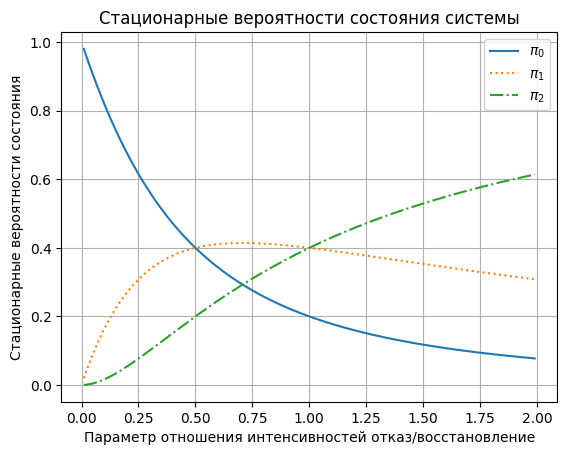

In [7]:
import matplotlib.pyplot as plt
import numpy as np
ro = np.arange (0.01, 2.0, 0.01)
pi0 = 1/(1 + 2*ro + 2*ro**2)
pi1 = 2*ro/(1 + 2*ro + 2*ro**2)
pi2 = (2*ro**2)/(1 + 2*ro + 2*ro**2)
plt.plot(ro,pi0,'-',label = '$\pi_0$')
plt.plot(ro,pi1,':',label = '$\pi_1$')
plt.plot(ro,pi2,'-.',label = '$\pi_2$')
plt.title('Стационарные вероятности состояния системы')
plt.xlabel('Параметр отношения интенсивностей отказ/восстановление')
plt.ylabel('Стационарные вероятности состояния')
plt.legend()
plt.grid(True)
plt.show()



На представленном графике показано изменение среднего числа элементов, находящихся в ремонте в зависимости от значений параметра $\rho$.  


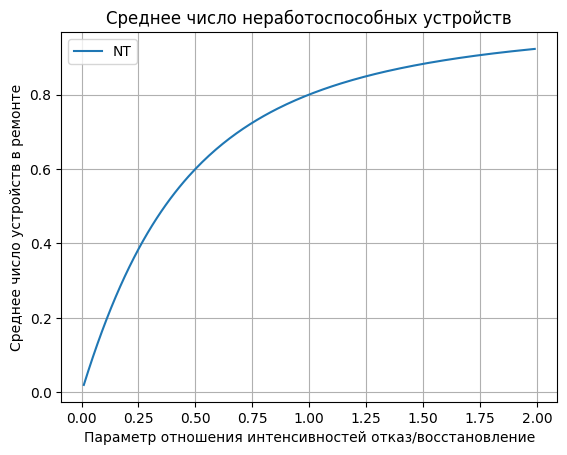

In [8]:
import matplotlib.pyplot as plt
import numpy as np
ro = np.arange (0.01, 2.0, 0.01)
NT = (2*ro*(ro + 1))/(1 + 2*ro + 2*ro**2)
plt.plot(ro,NT,label = 'NT')
plt.title('Среднее число неработоспособных устройств')
plt.xlabel('Параметр отношения интенсивностей отказ/восстановление')
plt.ylabel('Среднее число устройств в ремонте') #plt.show()
plt.legend()
plt.grid(True)
plt.show()
